In [4]:
# import des bibliotheques

from sklearn import datasets
from sklearn.neural_network import MLPClassifier #  permettre de definir notre reseau de neurones
from sklearn.metrics import accuracy_score # permet de mesure la metrique de performances 
import matplotlib.pyplot as plt # realiser des graphique
import matplotlib.colors # realiser des  graphiques

In [6]:
# charger le jeu de donnes

df = datasets.load_digits()
dir(df) # permet d'afficher les proprietes du jeu de donnees df 

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
# Verfier que les attribut images ont bien etait charger

df.images.shape

(1797, 8, 8)

In [8]:
# Verifier que l'attribut 'target' contient bien les classes d'image

print(f"Il y a { len(df.target) } classes dans df.target = {df.target} ")

Il y a 1797 classes dans df.target = [0 1 2 ... 8 9 8] 


In [10]:
# Acceder aux matrices d'images

print(df.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [14]:
# Visualiser certaines images  du jeu de donne 

def plot_digits(start) :
    fig = plt.figure(figsize = (10, 10))   # Créer une nouvelle figure avec une taille de 10x10 pouces
    cmap = matplotlib.colors.ListedColormap( ['red', 'black'] ) # Créer une colormap avec deux couleurs : rouge et noir
    
    # Itérer sur 12 images
    for im in range(12) :
        plt.subplot(3,4,im+1) # Créer une sous-trame dans une grille de 3 lignes et 4 colonnes, im+1 est l'indice de la sous-trame actuelle
        title = str(start+im) + ":" + str(df.target[start+im]) # Générer le titre pour la sous-trame actuelle en combinant l'indice de l'image et une valeur à partir du DataFrame 'df'
        plt.title(title)
        plt.imshow(df.images[start+im], cmap=cmap) # Afficher l'image à l'indice (start+im) du DataFrame 'df', en utilisant la colormap spécifiée 'cmap'
        plt.axis('off') # Désactiver les étiquettes et les graduations des axes pour la sous-trame actuelle
    plt.show

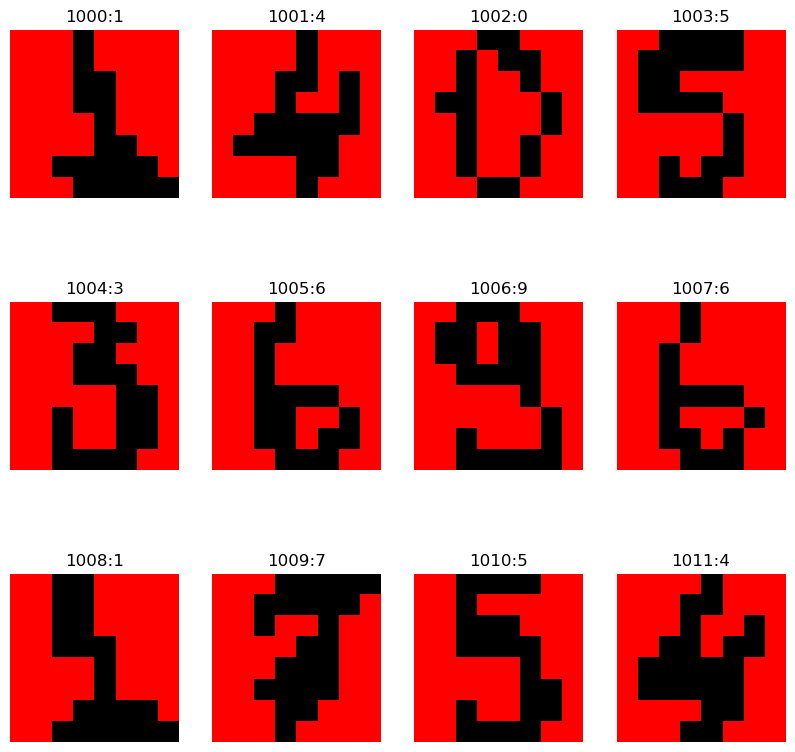

In [15]:
# affiche les 12 images successivement du  datatset 

plot_digits(1000)

In [18]:
# permet de reorganiser les images sous formes de tableaux

y = df.target # 
x = df.images.reshape((len(df.images), -1))

In [19]:
x.shape

(1797, 64)

In [20]:
# Construit le jeu de donnee d'entrainement 

x_train, y_train, x_test, y_test = x[:1347], y[:1347], x[1347:], y[1347:]

In [22]:
# intencier le reseau de neuronnes 

mlp_classifier = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', 
                               solver='sgd', tol=0.01, n_iter_no_change=30, random_state=1, alpha=0.0001,
                              learning_rate_init=.1, verbose=True)